     x    y
0  1.5  200
1  2.4  340
2  2.1  346
3  4.5  400
4  1.2  120
5  6.5  230
6  7.4  120
7  8.3    0
8  0.0  100
9  0.5  129
0    1.5
1    2.4
2    2.1
3    4.5
4    1.2
5    6.5
6    7.4
7    8.3
8    0.0
9    0.5
Name: x, dtype: float64
['1.5', ' 200']
['2.4', ' 340']
['2.1', ' 346']
['4.5', ' 400']
['1.2', ' 120']
['6.5', ' 230']
['7.4', ' 120']
['8.3', ' 0']
['0.0', ' 100']
['0.5', ' 129']
200.26000000000002
6234.1
-7.254284458766682
223.4547385381574


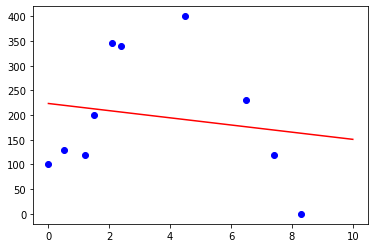

In [69]:
from csv import reader
import math as m
import statistics as stat
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Xi = []
Yi = []

U = pd.read_csv("datos.txt", names = ["x", "y"] )

print(U)

print(U["x"])


# importante: cambiar estaturas.txt por el archivo correspondiente
with open("datos.txt", 'r') as archivo_lectura:
    csv = reader(archivo_lectura)
    # ir fila a fila
    for linea in csv:
        # hacer algo con cada fila, asumo que cada fila tiene un solo valor
        print(linea)
        Xi.append(float(linea[0]))
        Yi.append(float(linea[1]))
        ## recordar el split

X = np.array(Xi)
Y = np.array(Yi)

sumx = sum(X)
sumy = sum(Y)
sumxy = sum(X*Y)
sumx2 = sum(X**2)
n = len(X)

print(sumx2)
print(sumxy)

A = (n*sumxy - (sumx*sumy)) / (n*sumx2 - sumx**2)
B = (sumy - A*sumx) /n

X2 = np.linspace(0, 10, n)
Y2 = A*X2 + B

plt.plot(X, Y, "ob")
plt.plot(X2, Y2, "r")

print(A)
print(B)


In [86]:
%%writefile leerArchivo.cpp

#include <iostream>
#include <fstream>
#include <vector>
#include <sstream>

using namespace std;


int main(int argc, char** argv)
{
    vector<double> X, Y;
    string nombre, linea;
    nombre = "datos.txt";
    ifstream archivo;
    archivo.open(nombre);
    int contLineas = 0;
    int n;
    if (!archivo)
    {
        cout << "Archivo inválido.";
    }
    else
    {
    while (getline(archivo, linea))
        {
            contLineas++;
            // Se imprime la línea completa
            cout << "Linea número " << contLineas << " : " << linea << endl;
            // Acá se divide la línea por los separadores
        
            char separador = ',';
            stringstream ssLinea(linea);
            string token;
            // acá se separa cada linea en los elementos entre los puntos y coma
            int cont = 0;
            while (getline(ssLinea, token, separador))
            {
                if (cont == 0) X.push_back(stof(token));
                if (cont == 1) Y.push_back(stof(token));
                cout << token << endl;
                cont++;
            } 
            //listado.push_back(elemento);
            // acá se arma el registro entero, es un <<listado>> de <<elementos>>
        }

    double sumx = 0.0, sumy = 0.0, sumxy = 0.0, sumx2 = 0.0, A, B;
    

    n = X.size();

    for (int i = 0; i < n; i++)
    {
        sumx = sumx + X[i];
        sumy = sumy + Y[i];
        sumxy = sumxy + X[i]*Y[i];
        sumx2 = sumx2 + X[i]*X[i];
    }
    A = (n*sumxy - (sumx*sumy)) / (n*sumx2 - sumx*sumx);
    B = (sumy - A*sumx) /n;
    cout << "Valor de A: " << A <<  " , valor de B: " << B << std::endl; 
    cout << "Escribiendo " << contLineas << " registros..." << endl;
    ofstream archivoS;
    archivoS.open("salida.txt");
    double dx = (10. - 0.) / n;
    double valor = 0.0;
    for (int i = 0; i < n; i++)
    {
        valor = A * (i*dx) + B;
        archivoS << i*dx << ", " << valor << endl;
    } 
    }


    

}

Overwriting leerArchivo.cpp


In [87]:
!g++ -o leerArchivo leerArchivo.cpp

In [88]:
!./leerArchivo

Linea número 1 : 1.5, 200, 2000
1.5
 200
 2000
Linea número 2 : 2.4, 340
2.4
 340
Linea número 3 : 2.1, 346
2.1
 346
Linea número 4 : 4.5, 400
4.5
 400
Linea número 5 : 1.2, 120
1.2
 120
Linea número 6 : 6.5, 230
6.5
 230
Linea número 7 : 7.4, 120
7.4
 120
Linea número 8 : 8.3, 0
8.3
 0
Linea número 9 : 0.0, 100
0.0
 100
Linea número 10 : 0.5, 129
0.5
 129
Valor de A: -7.25428 , valor de B: 223.455
Escribiendo 10 registros...
